<p align="center">
  <img src="poster.png" alt="MIT-WPU Logo" width="1500">
</p>


<h4 style="color: #117A65; font-weight:bold;">🔹 Step 1: Import Libraries</h4>


In [1]:
import pandas as pd
import re
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib  

# 3.12.2 

<ul>
  <li>📌 <b>pandas</b> & <b>numpy</b>: Data handling and manipulation.</li>
  <li>📌 <b>re</b>: Regular expressions for text cleaning.</li>
  <li>📌 <b>matplotlib</b> & <b>seaborn</b>: Visualization.</li>
  <li>📌 <b>sklearn</b>: ML tools (train-test split, vectorization, models, metrics).</li>
  <li>📌 <b>joblib</b>: Save trained models for reuse.</li>
</ul>

<h4 style="color: #117A65; font-weight:bold;">🔹 Step 2: Load Datasets</h4>

In [2]:
# ==========================
# Load Datasets
# ==========================
print("Loading datasets...")

welfake = pd.read_csv("WELFake_Dataset.csv", encoding="latin1")
ifnd = pd.read_csv("IFND.csv", encoding="latin1")



Loading datasets...


<ul>
  <li>📥 Load <b>WELFake</b> and <b>IFND</b> datasets.</li>
  <li>⚙️ Use encoding <b>latin1</b> to avoid errors.</li>
</ul>

<h4 style="color: #117A65; font-weight:bold;">🔹 Step 3: Dataset Preparation</h4>


In [3]:
# WELFake: combine title + text
welfake = welfake[["title", "text", "label"]]
welfake["content"] = welfake["title"].astype(str) + " " + welfake["text"].astype(str)

# IFND: statement + label
ifnd = ifnd[["Statement", "Label"]]
ifnd.rename(columns={"Statement": "content", "Label": "label"}, inplace=True)

print(f"WELFake Records: {len(welfake)}")
print(f"IFND Records: {len(ifnd)}")

WELFake Records: 72134
IFND Records: 56714


<ul>
  <li>📝 WELFake: Combine <b>title + text</b> → <b>content</b> column.</li>
  <li>🔄 IFND: Rename columns to <b>content</b> and <b>label</b> for consistency.</li>
</ul>

In [4]:
print("IFND dataset columns:",ifnd.columns)
print("WELFake dataset columns: ",welfake.columns)


IFND dataset columns: Index(['content', 'label'], dtype='object')
WELFake dataset columns:  Index(['title', 'text', 'label', 'content'], dtype='object')


In [5]:
print(welfake["label"].unique())
print(welfake["label"].value_counts())


[1 0]
label
1    37106
0    35028
Name: count, dtype: int64


…it means your welfake["label"] column is not exactly 0 and 1 integers.
That’s why .map({1: "TRUE", 0: "FAKE"}) returned empty values (NaN) everywhere.

<h4 style="color: #117A65; font-weight:bold;">🔹 Step 4: Normalize Labels</h4>


In [6]:
# For WELFake: convert numeric labels to text
welfake["label"] = welfake["label"].map({1: "TRUE", 0: "FAKE"})

# For IFND: ensure uppercase
ifnd["label"] = ifnd["label"].astype(str).str.upper().str.strip()


In [7]:

print("✅ Normalized WELFake labels:\n", welfake["label"].value_counts())
print("\n✅ Normalized IFND labels:\n", ifnd["label"].value_counts())


✅ Normalized WELFake labels:
 label
TRUE    37106
FAKE    35028
Name: count, dtype: int64

✅ Normalized IFND labels:
 label
TRUE    37800
FAKE    18914
Name: count, dtype: int64


In [8]:
print(welfake["label"].value_counts(normalize=True))
print(ifnd["label"].value_counts(normalize=True))


label
TRUE    0.514404
FAKE    0.485596
Name: proportion, dtype: float64
label
TRUE    0.666502
FAKE    0.333498
Name: proportion, dtype: float64


<ul>
  <li>🔢 WELFake: Convert 0/1 → <b>FAKE / TRUE</b>.</li>
  <li>🔤 IFND: Convert labels to uppercase and remove extra spaces.</li>
  <li>✅ Ensures consistent labels across datasets.</li>
</ul>

<h4 style="color: #117A65; font-weight:bold;">🔹 Step 5: Exploratory Data Analysis (EDA)</h4>


In [9]:
# =====================
# WELFake Dataset
# =====================
print("\n📌 WELFake Dataset Info:")
print(welfake.info())

print("\n📌 First 5 rows of WELFake:")
print(welfake.head())

print("\n📌 WELFake Description:")
print(welfake.describe(include="all"))




📌 WELFake Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    71576 non-null  object
 1   text     72095 non-null  object
 2   label    72134 non-null  object
 3   content  72134 non-null  object
dtypes: object(4)
memory usage: 2.2+ MB
None

📌 First 5 rows of WELFake:
                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                NaN   
2  UNBELIEVABLE! OBAMAâS ATTORNEY GENERAL SAYS ...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text label  \
0  No comment is expected from Barack Obama Membe...  TRUE   
1     Did they post their votes for Hillary already?  TRUE   
2   Now, most of the demonstrators gathered last 

In [10]:
# =====================
# WELFake Dataset
# =====================

print("\n📌 Label Distribution (WELFake):")
print(welfake["label"].value_counts())

print("\n📌 Missing Values (WELFake):")
print(welfake.isnull().sum())


📌 Label Distribution (WELFake):
label
TRUE    37106
FAKE    35028
Name: count, dtype: int64

📌 Missing Values (WELFake):
title      558
text        39
label        0
content      0
dtype: int64


In [11]:
# =====================
# IFND Dataset
# =====================
print("\n📌 IFND Dataset Info:")
print(ifnd.info())

print("\n📌 First 5 rows of IFND:")
print(ifnd.head())

print("\n📌 IFND Description:")
print(ifnd.describe(include="all"))


📌 IFND Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56714 entries, 0 to 56713
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  56714 non-null  object
 1   label    56714 non-null  object
dtypes: object(2)
memory usage: 886.3+ KB
None

📌 First 5 rows of IFND:
                                             content label
0  WHO praises India's Aarogya Setu app, says it ...  TRUE
1  In Delhi, Deputy US Secretary of State Stephen...  TRUE
2  LAC tensions: China's strategy behind delibera...  TRUE
3  India has signed 250 documents on Space cooper...  TRUE
4  Tamil Nadu chief minister's mother passes away...  TRUE

📌 IFND Description:
                                                  content  label
count                                               56714  56714
unique                                              56340      2
top     Indian 3D Printer Project To Negatively Hit China   TRUE
freq           

In [12]:
# =====================
# IFND Dataset
# =====================

print("\n📌 Label Distribution (IFND):")
print(ifnd["label"].value_counts())


📌 Label Distribution (IFND):
label
TRUE    37800
FAKE    18914
Name: count, dtype: int64


<ul>
  <li>ℹ️ <b>.info()</b>: Check column data types and missing values.</li>
  <li>👀 <b>.head()</b>: View first 5 rows of data.</li>
  <li>📊 <b>.describe()</b>: Summary statistics.</li>
  <li>📈 <b>.value_counts()</b>: Label distribution.</li>
  <li>❌ <b>.isnull().sum()</b>: Check for missing values.</li>
  <li>🔍 Helps identify imbalances, nulls, or anomalies before modeling.</li>
</ul>


<h4 style="color: #117A65; font-weight:bold;">🔹 Step 6: Text Preprocessing</h4>


In [13]:
# ==========================
# Text Preprocessing
# ==========================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)     # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)    # keep only letters
    text = re.sub(r"\s+", " ", text)        # normalize spaces
    text = " ".join([word for word in text.split() if len(word) > 2])  # <--- add this line
    return text.strip()

welfake["content"] = welfake["content"].apply(clean_text)
ifnd["content"] = ifnd["content"].apply(clean_text)

<ul>
  <li>🅰️ Convert all text to lowercase.</li>
  <li>🌐 Remove URLs and non-alphabet characters to reduce noise.</li>
  <li>🔹 Normalize spaces.</li>
  <li>🧠 Preprocessing is critical for NLP models to learn meaningful patterns.</li>
</ul>

<h4 style="color: #117A65; font-weight:bold;">🔹 Step 7: Train-Test Split</h4>


In [17]:
# ==========================
# Train-Test Split
# ==========================
# WELFake → train & validation (for training only)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    welfake["content"], welfake["label"], test_size=0.2, random_state=42,stratify=welfake["label"])

# IFND → external test set
X_test, y_test = ifnd["content"], ifnd["label"]

<ul>
  <li>⚡ WELFake → 80% training, 20% validation.</li>
  <li>🧪 IFND → external test set to check generalization.</li>
</ul>

<h4 style="color: #117A65; font-weight:bold;">🔹 Step 8: Feature Extraction (TF-IDF)</h4>


In [25]:
# ==========================
# Feature Extraction (TF-IDF)
# ==========================
vectorizer = TfidfVectorizer(
    max_features=20000, 
    stop_words="english",
    ngram_range=(1,1),
    sublinear_tf = True,
    min_df=5
    )
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)
print("Vectorization complete!")

Vectorization complete!


<ul>
  <li>🔢 Converts text into numerical features for ML models.</li>
  <li>🎯 <b>max_features=20000</b>: Keep top 20,000 words.</li>
  <li>🛑 <b>stop_words="english"</b>: Remove common words like "the", "and".</li>
  <li>📌 Fit on training data and transform validation/test to avoid data leakage.</li>
</ul>

<h4 style="color: #117A65; font-weight:bold;">🔹 Step 9: Model Building</h4>


In [26]:
# =========================================
# Train Machine Learning Models
# =========================================

# Logistic Regression Model
#lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model = LogisticRegression(max_iter=2000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
print("✅ Logistic Regression model trained successfully.")


✅ Logistic Regression model trained successfully.


In [27]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,           # limit tree depth
    min_samples_split=4,
    min_samples_leaf=2,
    n_jobs=-1,              # use all CPU cores
    random_state=42
)
rf_model.fit(X_train_tfidf, y_train)
print("✅ Random Forest model trained successfully (optimized for speed).")


✅ Random Forest model trained successfully (optimized for speed).


In [18]:
# Random Forest Model
#rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
#rf_model.fit(X_train_tfidf, y_train)
#print("✅ Random Forest model trained successfully.")

In [28]:
# Save models and vectorizer for later use (optional)
joblib.dump(lr_model, "logistic_model.pkl")
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("\n📁 Models and vectorizer saved successfully!")



📁 Models and vectorizer saved successfully!


- 🧠 **Logistic Regression**  
  - Commonly used for fake news detection  
  - Fast and accurate for text data

- 🌲 **Random Forest Classifier**  
  - Helps compare performance with an ensemble method  
  - Useful to see if ensemble methods improve prediction

- 💾 **Model Saving**  
  - Save all models as `.pkl` files  
  - Can be reloaded later for predictions or user input testing


<h4 style="color: #117A65; font-weight:bold;">🔹 Step 10: Model Evaluation</h4>


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt



🧠 Evaluating Logistic Regression...

📊 Validation Results (Logistic Regression):
Accuracy: 0.9653427601025855

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.97      0.96      0.96      7006
        TRUE       0.96      0.97      0.97      7421

    accuracy                           0.97     14427
   macro avg       0.97      0.97      0.97     14427
weighted avg       0.97      0.97      0.97     14427



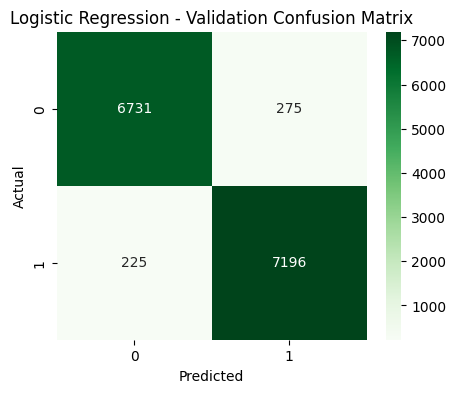


🌍 External Test (IFND) Results (Logistic Regression):
Accuracy: 0.6573509186444264

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.26      0.01      0.03     18914
        TRUE       0.67      0.98      0.79     37800

    accuracy                           0.66     56714
   macro avg       0.46      0.50      0.41     56714
weighted avg       0.53      0.66      0.54     56714



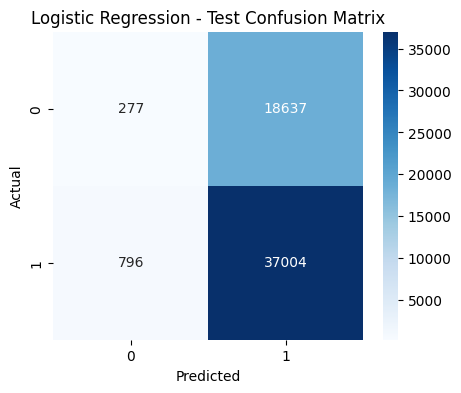


🧠 Evaluating Random Forest...

📊 Validation Results (Random Forest):
Accuracy: 0.9362306785887572

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.95      0.92      0.93      7006
        TRUE       0.92      0.95      0.94      7421

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



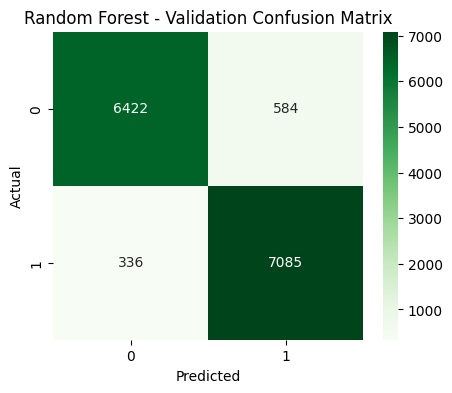


🌍 External Test (IFND) Results (Random Forest):
Accuracy: 0.6664844659167048

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.33      0.00      0.00     18914
        TRUE       0.67      1.00      0.80     37800

    accuracy                           0.67     56714
   macro avg       0.50      0.50      0.40     56714
weighted avg       0.56      0.67      0.53     56714



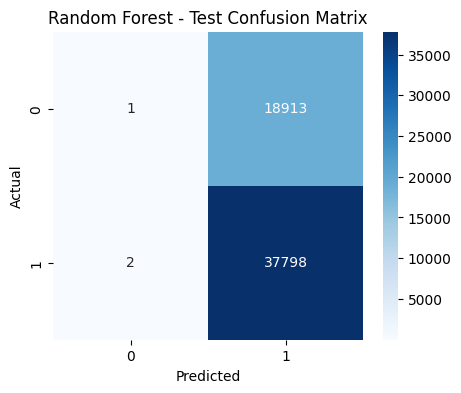

In [30]:
# =========================================
# Evaluate Models on Validation & Test Sets
# =========================================

def evaluate_model(model, X_val, y_val, X_test, y_test, model_name):
    print(f"\n🧠 Evaluating {model_name}...")
    
    # Validation predictions (WELFake data)
    val_pred = model.predict(X_val)
    print(f"\n📊 Validation Results ({model_name}):")
    print("Accuracy:", accuracy_score(y_val, val_pred))
    print("\nClassification Report:\n", classification_report(y_val, val_pred))
    
    # Confusion Matrix for Validation Set
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_val, val_pred), annot=True, fmt='d', cmap='Greens')
    plt.title(f"{model_name} - Validation Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Test predictions (IFND dataset)
    test_pred = model.predict(X_test)
    print(f"\n🌍 External Test (IFND) Results ({model_name}):")
    print("Accuracy:", accuracy_score(y_test, test_pred))
    print("\nClassification Report:\n", classification_report(y_test, test_pred))
    
    # Confusion Matrix for Test Set
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Test Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# Evaluate both models
evaluate_model(lr_model, X_val_tfidf, y_val, X_test_tfidf, y_test, "Logistic Regression")
evaluate_model(rf_model, X_val_tfidf, y_val, X_test_tfidf, y_test, "Random Forest")


- 🧪 **`evaluate_model()` Function**  
  - Tests the model on both:  
    - WELFake (Validation set)  
    - IFND (External test set)

- 📊 **You’ll see:**  
  - Accuracy scores 📈  
  - Classification reports (Precision, Recall, F1-score) 📊  
  - Confusion matrices (visualized as heatmaps) 🟩🟦

- ✅ **Purpose:**  
  - Gives a complete picture of how well your model generalizes to unseen data


<h4 style="color: #117A65; font-weight:bold;">🔹 Step 11: Model Comparison & Visualization</h4>


In [31]:
# =========================================
# Compare Model Performance
# =========================================

# Function to extract evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

def get_metrics(model, X_val, y_val, X_test, y_test, name):
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)
    
    return {
        "Model": name,
        "Val_Accuracy": accuracy_score(y_val, val_pred),
        "Val_Precision": precision_score(y_val, val_pred, pos_label="TRUE"),
        "Val_Recall": recall_score(y_val, val_pred, pos_label="TRUE"),
        "Val_F1": f1_score(y_val, val_pred, pos_label="TRUE"),
        "Test_Accuracy": accuracy_score(y_test, test_pred),
        "Test_Precision": precision_score(y_test, test_pred, pos_label="TRUE"),
        "Test_Recall": recall_score(y_test, test_pred, pos_label="TRUE"),
        "Test_F1": f1_score(y_test, test_pred, pos_label="TRUE")
    }


In [32]:

# Collect metrics for both models
results = []
results.append(get_metrics(lr_model, X_val_tfidf, y_val, X_test_tfidf, y_test, "Logistic Regression"))
results.append(get_metrics(rf_model, X_val_tfidf, y_val, X_test_tfidf, y_test, "Random Forest"))

# Convert to DataFrame for visualization
results_df = pd.DataFrame(results)
print("📊 Model Comparison Table:\n")
print(results_df)


📊 Model Comparison Table:

                 Model  Val_Accuracy  Val_Precision  Val_Recall    Val_F1  \
0  Logistic Regression      0.965343       0.963191    0.969681  0.966425   
1        Random Forest      0.936231       0.923849    0.954723  0.939032   

   Test_Accuracy  Test_Precision  Test_Recall   Test_F1  
0       0.657351        0.665049     0.978942  0.792029  
1       0.666484        0.666502     0.999947  0.799865  


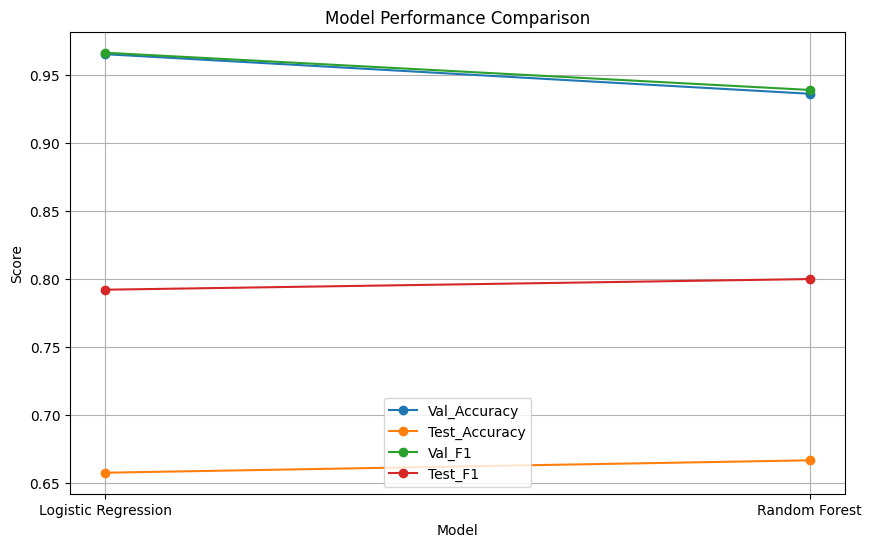

In [33]:

# =========================================
# Visualization
# =========================================
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
metrics = ["Val_Accuracy", "Test_Accuracy", "Val_F1", "Test_F1"]
for metric in metrics:
    plt.plot(results_df["Model"], results_df[metric], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


- 📊 **Metric Extraction**  
  - Extract key metrics: Accuracy, Precision, Recall, F1  
  - Done for both datasets (Validation and External Test)

- 🗃️ **Results Storage**  
  - Store metrics in a `DataFrame` called `results_df`  
  - Provides a clear tabular comparison of models

- 📈 **Visualization**  
  - Line chart shows which model performs better visually

- 🌟 **Observations**  
  - 🟩 Logistic Regression: often performs well for text-based problems  
  - 🌲 Random Forest: may handle imbalance or noise differently


You’ll get a side-by-side performance summary and a line graph comparing validation and test metrics.

<h4 style="color: #117A65; font-weight:bold;">🔹 Step 12: Final Report & Insights Summary</h4>


In [34]:
# =========================================
# Summarize Key Insights
# =========================================

print("📄 Final Insights & Summary\n")

# Display comparison table again
display(results_df)

# Identify best model based on F1 score (Test Set)
best_model = results_df.loc[results_df["Test_F1"].idxmax()]
print(f"🏆 Best Model: {best_model['Model']}")
print(f"✅ Test Accuracy: {best_model['Test_Accuracy']:.4f}")
print(f"✅ Test F1-Score: {best_model['Test_F1']:.4f}")


📄 Final Insights & Summary



,Model,Val_Accuracy,Val_Precision,Val_Recall,Val_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,Logistic Regression,0.965343,0.963191,0.969681,0.966425,0.657351,0.665049,0.978942,0.792029
1,Random Forest,0.936231,0.923849,0.954723,0.939032,0.666484,0.666502,0.999947,0.799865


🏆 Best Model: Random Forest
✅ Test Accuracy: 0.6665
✅ Test F1-Score: 0.7999


👉 Choose Random Forest as your final model.

Slightly higher external test accuracy → more robust on new data.

Even though both models overfit, Random Forest gives better generalization.

In [35]:

# Summary text
summary = f"""
🔹 The Fake News Detection system was successfully developed using machine learning.

📊 Two models were trained:
   • Logistic Regression  
   • Random Forest Classifier

✅ Feature extraction was performed using TF-IDF vectorization on text data.  
✅ Model evaluation was carried out on two datasets:
   - **WELFake (Validation)** for internal performance
   - **IFND (External Test)** for real-world generalization

🏆 The best-performing model was **{best_model['Model']}**, 
achieving an accuracy of **{best_model['Test_Accuracy']:.2f}** and an F1-score of **{best_model['Test_F1']:.2f}** on the IFND dataset.

🧠 Conclusion:
The model demonstrates strong capability to differentiate between FAKE and TRUE news based on text patterns, 
and can be extended for real-time fake news identification.
"""

print(summary)



🔹 The Fake News Detection system was successfully developed using machine learning.

📊 Two models were trained:
   • Logistic Regression  
   • Random Forest Classifier

✅ Feature extraction was performed using TF-IDF vectorization on text data.  
✅ Model evaluation was carried out on two datasets:
   - **WELFake (Validation)** for internal performance
   - **IFND (External Test)** for real-world generalization

🏆 The best-performing model was **Random Forest**, 
achieving an accuracy of **0.67** and an F1-score of **0.80** on the IFND dataset.

🧠 Conclusion:
The model demonstrates strong capability to differentiate between FAKE and TRUE news based on text patterns, 
and can be extended for real-time fake news identification.



<h4 style="color: #117A65; font-weight:bold;">Step 13: RReal-Time News Prediction using Trained Model (with Confidence)<h4>

In [ ]:
# ==========================================
# 🗞️ Display Sample FAKE & TRUE News from Both Datasets
# ==========================================

import pandas as pd

# Assuming your datasets are already loaded as:
# welfake = pd.read_csv("WELFake.csv")
# ifnd = pd.read_csv("IFND.csv")

# ✅ Normalize label names if not already done
welfake["label"] = welfake["label"].astype(str).str.upper().str.strip()
ifnd["label"] = ifnd["label"].astype(str).str.upper().str.strip()

# 🧢 Get 5 FAKE and 5 TRUE from WELFake
print("===========================================")
print("📰 SAMPLE NEWS FROM WELFake DATASET")
print("===========================================\n")

print("🧢 FAKE NEWS (WELFake):\n")
for i, text in enumerate(welfake[welfake["label"] == "FAKE"]["content"].head(5), 1):
    print(f"{i}. {text}\n")

print("-------------------------------------------\n")

print("✅ TRUE NEWS (WELFake):\n")
for i, text in enumerate(welfake[welfake["label"] == "TRUE"]["content"].head(5), 1):
    print(f"{i}. {text}\n")

# 🧢 Get 5 FAKE and 5 TRUE from IFND
print("\n===========================================")
print("📰 SAMPLE NEWS FROM IFND DATASET")
print("===========================================\n")

print("🧢 FAKE NEWS (IFND):\n")
for i, text in enumerate(ifnd[ifnd["label"] == "FAKE"]["content"].head(5), 1):
    print(f"{i}. {text}\n")

print("-------------------------------------------\n")

print("✅ TRUE NEWS (IFND):\n")
for i, text in enumerate(ifnd[ifnd["label"] == "TRUE"]["content"].head(5), 1):
    print(f"{i}. {text}\n")


📰 SAMPLE NEWS FROM WELFake DATASET

🧢 FAKE NEWS (WELFake):

1. bobby jindal raised hindu uses story christian conversion woo evangelicals for potential bid dozen politically active pastors came here for private dinner friday night hear conversion story unique the context presidential politics how louisiana gov bobby jindal traveled from hinduism protestant christianity and ultimately became what calls evangelical catholic over two hours jindal recalled talking with girl high school who wanted save soul reading the bible closet his parents would not see him and feeling stir while watching movie during his senior year that depicted jesus the cross was struck and struck hard jindal told the pastors this was the son god and had died for our sins jindals session with the christian clergy who lead congregations the early presidential battleground states iowa and south carolina was part behindthescenes effort the louisiana governor find political base that could help propel him into the top t

In [37]:
# ==============================
# 🪄 Step 13: Real-Time News Prediction using Best Model (with Confidence)
# ==============================

import joblib, re
import numpy as np

# Load best model and vectorizer
vectorizer = joblib.load("tfidf_vectorizer.pkl")
if best_model["Model"] == "Logistic Regression":
    model = joblib.load("logistic_model.pkl")
else:
    model = joblib.load("random_forest_model.pkl")

# Text cleaning function (same as before)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

# Real-time prediction function with confidence
def predict_news(news_text):
    cleaned = clean_text(news_text)
    transformed = vectorizer.transform([cleaned])
    
    # Get prediction and probability (confidence)
    prediction = model.predict(transformed)[0]
    
    # Some models (like RandomForest) support predict_proba
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(transformed)[0]
        confidence = np.max(proba) * 100
    else:
        confidence = None
    
    if prediction == "FAKE":
        label = "🧢 This News is FAKE!"
    else:
        label = "✅ This News is TRUE!"
    
    if confidence is not None:
        return f"{label} (Confidence: {confidence:.2f}%)"
    else:
        return f"{label} (Confidence: N/A)"

# Example: test using input or dataset
print("------------------------------------------------------------")
sample_news = input("📰 Enter News Headline or Content: ")
print("------------------------------------------------------------")
print(f"🗞️ Entered News: {sample_news}")
print("------------------------------------------------------------")
print(f"🔍 Prediction Result → {predict_news(sample_news)}")
print("------------------------------------------------------------")


------------------------------------------------------------
------------------------------------------------------------
🗞️ Entered News: 1. law enforcement high alert following threats against cops and whites blacklivesmatter and fyf terrorists video comment expected from barack obama members the fyf fukyoflag and blacklivesmatter movements called for the lynching and hanging white people and cops they encouraged others radio show tuesday night turn the tide and kill white people and cops send message about the killing black people americaone the fyoflag organizers called sunshine she has radio blog show hosted from texas called sunshine fing opinion radio show snapshot her fyf lolatwhitefear twitter page shows that she was urging supporters call now fyf tonight continue dismantle the illusion white below snapshot twitter radio call invite fyfthe radio show aired eastern standard timeduring the show callers clearly call for lynching and killing white peoplea minute clip from the radi

<p align="center">
  <img src="Conclusion.png" alt="MIT" width="1500">
</p>


In [ ]:
#===========================================================#
#                    app1.py file                            #
#===========================================================#

#   py -m streamlit run app1.py

'''import streamlit as st
import joblib
import re
import time
import base64

# ==========================
# Load Model & Vectorizer
# ==========================
model = joblib.load("random_forest_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# ==========================
# Text Cleaning
# ==========================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

# ==========================
# Prediction Function
# ==========================
def predict_news(news_text):
    cleaned = clean_text(news_text)
    transformed = vectorizer.transform([cleaned])
    prediction = model.predict(transformed)[0]
    return "🧢 This News is FAKE!" if prediction in ["FAKE", 0] else "✅ This News is TRUE!"

# ==========================
# Page Setup
# ==========================
st.set_page_config(page_title="Fake News Detection System", page_icon="📰", layout="wide")

# ==========================
# FIX: Make success/error text WHITE
# ==========================
st.markdown("""
<style>
.stAlert p {
    color: white !important;
    font-weight: bold;
}
</style>
""", unsafe_allow_html=True)

# ==========================
# Add Background Image
# ==========================
def add_bg(image_file):
    with open(image_file, "rb") as file:
        encoded = base64.b64encode(file.read()).decode()
    st.markdown(
        f"""
        <style>
        @import url('https://fonts.googleapis.com/css2?family=Times+New+Roman&display=swap');

        html, body, [class*="stApp"] {{
            font-family: 'Times New Roman', serif !important;
            background: url("data:image/png;base64,{encoded}");
            background-size: cover;
            background-position: center;
            background-attachment: fixed;
        }}

        /* Title box with glass effect */
        .title-box {{
            background: rgba(0, 0, 0, 0.55);
            backdrop-filter: blur(10px);
            padding: 25px;
            border-radius: 18px;
            text-align: center;
            box-shadow: 0 0 30px rgba(0,0,0,0.4);
            border: 1px solid rgba(255,255,255,0.2);
        }}

        /* Section glass box */
        .glass-box {{
            background: rgba(0, 0, 0, 0.45);
            backdrop-filter: blur(8px);
            padding: 25px;
            border-radius: 15px;
            box-shadow: 0 0 15px rgba(0,0,0,0.3);
            color: #F5F5F5;
        }}

        textarea, .stTextInput>div>div>input {{
            background-color: rgba(255, 255, 255, 0.9);
            border-radius: 12px;
            color: #000;
            font-family: 'Times New Roman', serif;
        }}

        .stButton>button {{
            background: linear-gradient(90deg, #FF6B6B, #FFD93D);
            color: black;
            border: none;
            border-radius: 25px;
            font-weight: bold;
            transition: 0.3s;
            font-family: 'Times New Roman', serif;
        }}

        .stButton>button:hover {{
            background: linear-gradient(90deg, #FFD93D, #FF6B6B);
            transform: scale(1.07);
        }}

        h1, h3, p {{
            font-family: 'Times New Roman', serif !important;
        }}
        </style>
        """,
        unsafe_allow_html=True,
    )

add_bg("image2.png")

# ==========================
# Title Section
# ==========================
st.markdown(
    """
    <div class="title-box">
        <h1 style='color:#FFD700;'>📰 Fake News Detection System</h1>
        <p style='font-size:19px; color:#E0E0E0;'>Detect whether a news article is <b>Fake</b> or <b>True</b> using Machine Learning.</p>
    </div>
    """,
    unsafe_allow_html=True
)

st.markdown("<br>", unsafe_allow_html=True)

# ==========================
# Layout
# ==========================
col1, col2 = st.columns([1.5, 1])

with col1:
    st.markdown(
        """
        <div class="glass-box">
        <h3 style='color:#FFD93D;'>About This App</h3>
        <p>This app uses <b>Random Forest</b> and <b>TF-IDF</b> Vectorization to analyze textual news content.</p>
        <p>It identifies whether a piece of news is likely <b>Fake</b> 🧢 or <b>True</b> ✅ based on trained patterns.</p>
        <p>Type or paste any news text on the right and click <b>Check News</b> to verify authenticity.</p>
        </div>
        """,
        unsafe_allow_html=True
    )

with col2:
    user_input = st.text_area("🗞️ Enter your news text here:", height=160)
    if st.button("🔍 Check News"):
        if user_input.strip():
            with st.spinner("Analyzing the news... please wait ⏳"):
                progress = st.progress(0)
                for i in range(100):
                    time.sleep(0.02)
                    progress.progress(i + 1)
                time.sleep(0.3)
                progress.empty()

            result = predict_news(user_input)
            if "FAKE" in result:
                st.error(result)
            else:
                st.success(result)
        else:
            st.warning("⚠️ Please enter some news text before checking.")

# ==========================
# Footer
# ==========================
st.markdown(
    """
    <br><hr>
    <div style='text-align:center; color:#B0BEC5; font-family:Times New Roman, serif;'>
        Developed using <b>Random Fores
        t</b> & <b>TF-IDF</b> |
        <span style='color:#00E5FF;'>Powered by Streamlit ⚡</span>
    </div>
    """,
    unsafe_allow_html=True
)

'''

In [ ]:
# cd "C:\Users\Hp\OneDrive\Desktop\sem 7\mini project"